In [160]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from generate_paths import random_path, noise_path
from set_lsh import SetLSH, jaccard


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
def plot_paths(paths):
    for path in paths:
        xs, ys = zip(*path)
        plt.plot(xs, ys)
        
    plt.ylim(0, 20)
    plt.xlim(0, 20)
    plt.show()

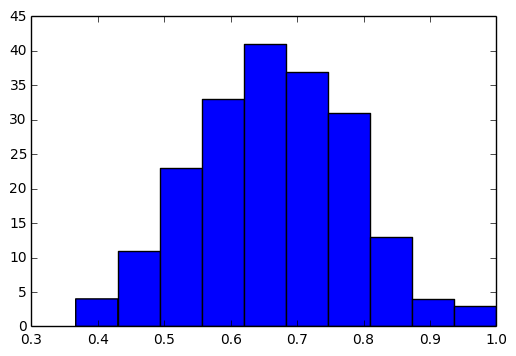

In [201]:
# Generate paths
paths = [random_path(5, 17, 20) for _ in range(200)]

# Add noise to paths
def noise_fn():
    return int(np.random.normal(0, 0.7)), int(np.random.normal(0, 0.7))
noisy_paths = [noise_path(path, noise_fn) for path in paths]

# Plot paths
#plot_paths(paths)
#plot_paths(noisy_paths)

# Turn paths into sets
paths_set = map(set, paths)
noisy_paths_set = map(set, noisy_paths)

# Histogram of jaccard distance between paths and noisy paths
plt.hist([jaccard(paths_set[i], noisy_paths_set[i]) for i in range(len(paths_set))])
plt.show()

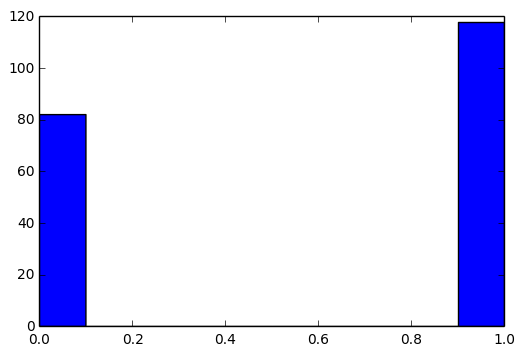

In [202]:
# Create LSH
lsh = SetLSH(10, 6)

# Add non-noisy paths into hash
for path in paths_set:
    lsh.insert(path)

# Stores how different is the Jaccard distance between the retreived path and
# original path
dists = []

for path, noisy_path in zip(paths_set, noisy_paths_set):
    res, cost = lsh.query(noisy_path)
    dists.append(jaccard(res, path))

plt.hist(dists)
plt.show()